# E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
db=pd.read_excel('C:/Users/Shalini Maurya/Desktop/dataset/customer_retention_dataset.xlsx',sheet_name='datasheet')

In [3]:
db.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       
1  ...                            Amazon.in, Flipkart.com       
2  ...                                         Myntra.com       
3  ...                                       Snapdeal.com       
4 

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
db.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome       

# EDA

In [6]:
data.shape

(269, 71)

In [31]:
db.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

# About the columns

In this data there are some customer information available like, their Gender,Age,Location,Since how long they are doing shoping.
some important information can be found here to analyze customer retention:-

1)After first visit, how do you reach the online retail store?--It shows what options customers are using to reach out the same product.

2)Why did you abandon the “Bag”, “Shopping Cart”?-- It shows the reason of not buying some selected products. 

3)Loading and processing speed

4)Convenient Payment methods

5)Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)

6)Complete, relevant description information of products

7)Speedy order delivery

8)Which of the Indian online retailer would you recommend to a friend

In [32]:
db.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

# Univariate Analysis:

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64


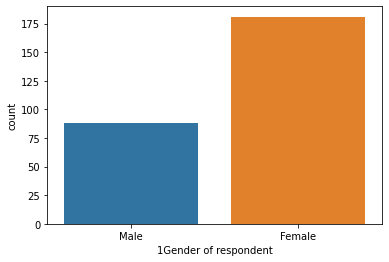

In [16]:
#Lets check Male and Female Counts:-
sns.countplot(x='1Gender of respondent',data=db)
print(db["1Gender of respondent"].value_counts())

It shows that females do shoping more than males

In [36]:
#lets check the agegroup
plt.figure(figsize=(15,5))
sns.countplot(x='2 How old are you? ', data=db)
print(db['2 How old are you? '].value_counts())

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64


In [20]:
# Let's check the most online shopping city

plt.figure(figsize=(15,5))
sns.countplot(x='3 Which city do you shop online from?', data=db)
print(db['3 Which city do you shop online from?'].value_counts())

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64


In [35]:
#After first visit, how do you reach the online retail store
plt.figure(figsize=(10,5))
sns.countplot(x='13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',data=db)
print(db['13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   '].value_counts())

Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: 13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   , dtype: int64


Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: 17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       , dtype: int64


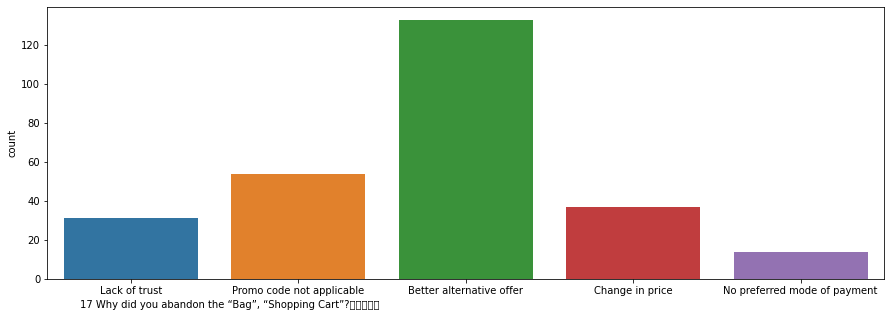

In [46]:
#Why did you abandon the “Bag”, “Shopping Cart”?
plt.figure(figsize=(15,5))
sns.countplot(x='17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ',data=db)
print(db['17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       '].value_counts())

In [45]:
#Loading and processing speed
plt.figure(figsize=(15,5))
sns.countplot(x='23 Loading and processing speed',data=db)
print(db['23 Loading and processing speed'].value_counts())

Strongly agree (5)       115
Agree (4)                112
Dis-agree (2)             18
Strongly disagree (1)     12
Indifferent (3)           12
Name: 23 Loading and processing speed, dtype: int64


In [44]:
#Convenient Payment methods
plt.figure(figsize=(15,4))
sns.countplot(x='25 Convenient Payment methods',data=db)
print(db["25 Convenient Payment methods"].value_counts())

Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: 25 Convenient Payment methods, dtype: int64


Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), dtype: int64


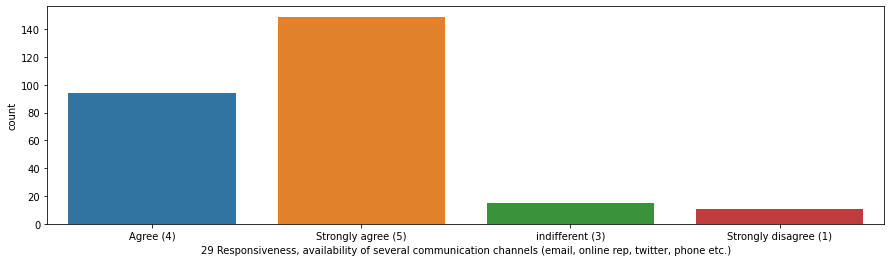

In [47]:
#5)Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)
plt.figure(figsize=(15,4))
sns.countplot(x='29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',data=db)
print(db['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'].value_counts())

Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: Complete, relevant description information of products, dtype: int64


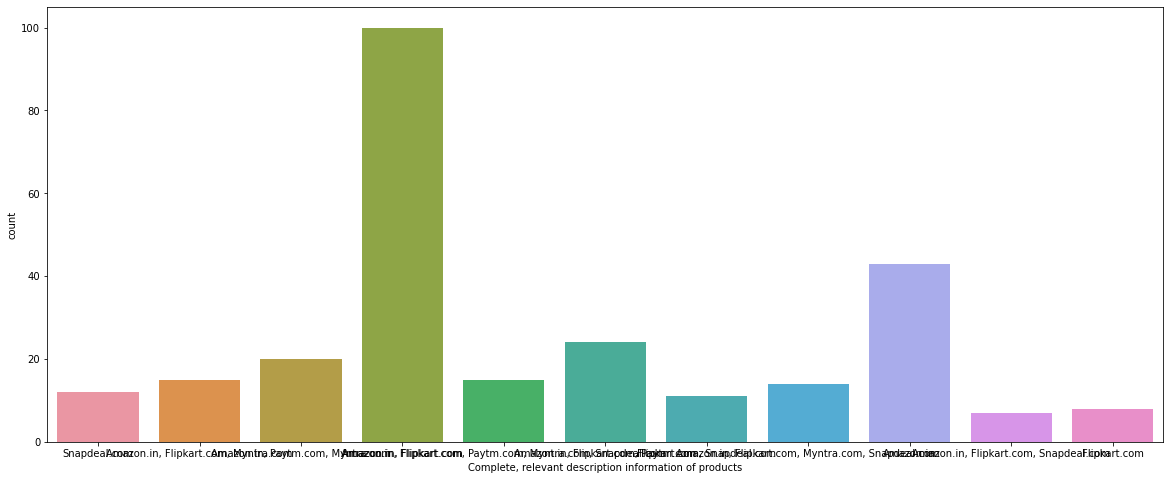

In [51]:
#Complete, relevant description information of products
plt.figure(figsize=(20,8))
sns.countplot(x='Complete, relevant description information of products',data=db)
print(db['Complete, relevant description information of products'].value_counts())

Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Speedy order delivery , dtype: int64


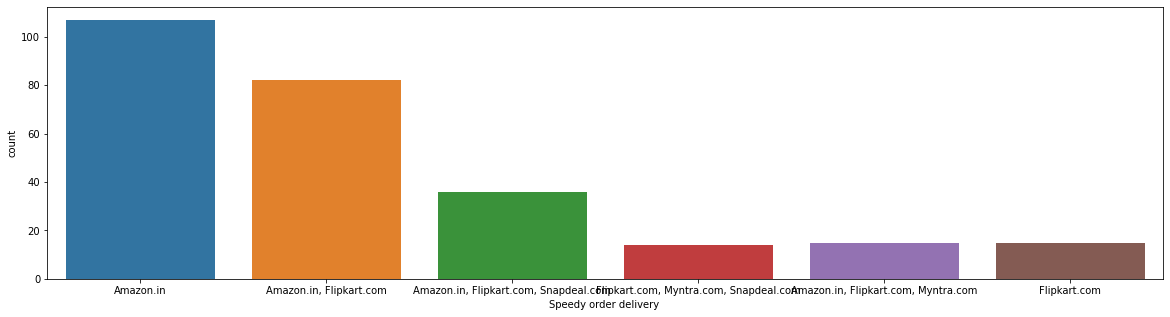

In [54]:
#Speedy order delivery 
plt.figure(figsize=(20,5))
sns.countplot(x='Speedy order delivery ',data=db)
print(db['Speedy order delivery '].value_counts())

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64


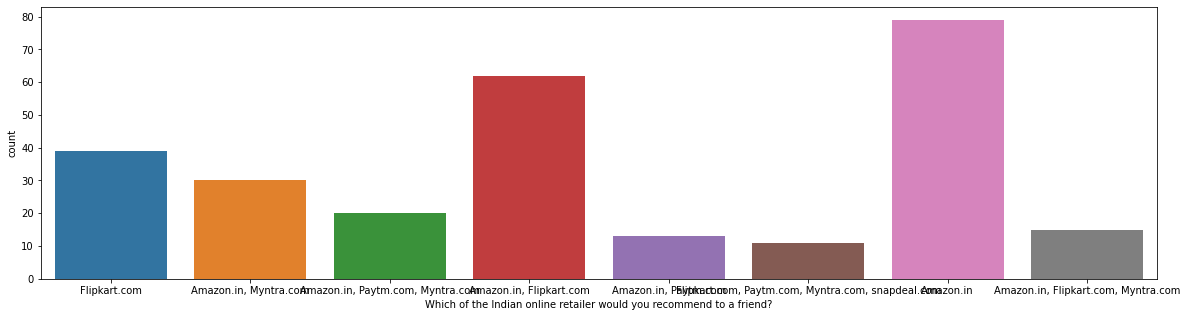

In [55]:
#Which of the Indian online retailer would you recommend to a friend?
plt.figure(figsize=(20,5))
sns.countplot(x='Which of the Indian online retailer would you recommend to a friend?',data=db)
print(db['Which of the Indian online retailer would you recommend to a friend?'].value_counts())

# CONCLUSION:-
 Customer retention refers to a company’s ability to turn customers into repeat buyers and prevent them from switching to a competitor. For achieving this a company need to work on all possibilities. Here It shows that all the factors affecting in some ways to retain a customer.